## Imports

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import yfinance as yf
import plotnine as p9
import statsmodels.formula.api as smf

import plotnine as p9
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load Yahoo Data

We will be getting Dividend Adjusted data -> which could be the difference between Yahoo and TradingView data

In [ ]:
# tickers = ['SPY', 'TLT']
# ydata = yf.Tickers(tickers).download(period="max", auto_adjust=True)   # get dividend adjusted prices

[*********************100%***********************]  2 of 2 completed


Convert Yahoo Data to long-format

In [ ]:
# data = (   # put data in long form
#     ydata
#     .dropna()
#     .stack(1, future_stack=True)
#     .reset_index()
#     [['Date', 'Ticker', 'Close']]
#     .sort_values(by=['Date', 'Ticker'])
# )

# data.head(5)

Price,Date,Ticker,Close
0,2002-07-30,SPY,59.177723
1,2002-07-30,TLT,37.055679
2,2002-07-31,SPY,59.320908
3,2002-07-31,TLT,37.514790
4,2002-08-01,SPY,57.772160


In [ ]:
# # download historical data from Yahoo Finance to csv, file name data_<tickers>_2002-07-30_D.csv
# data.to_csv('data_SPY_TLT_2002-07-30_D.csv', index=False)

## Create return data for the various periods of Month defined by (N, M)

In [5]:
# read data from csv
data = pd.read_csv('data_SPY_TLT_2002-07-30_D.csv')
data['Date'] = pd.to_datetime(data['Date'])
print(data.info())
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11704 non-null  datetime64[ns]
 1   Ticker  11704 non-null  object        
 2   Close   11704 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 274.4+ KB
None
        Date Ticker      Close
0 2002-07-30    SPY  59.177723
1 2002-07-30    TLT  37.055679
2 2002-07-31    SPY  59.320908
3 2002-07-31    TLT  37.514790
4 2002-08-01    SPY  57.772160


## Relation between SOM and EOM relative returns

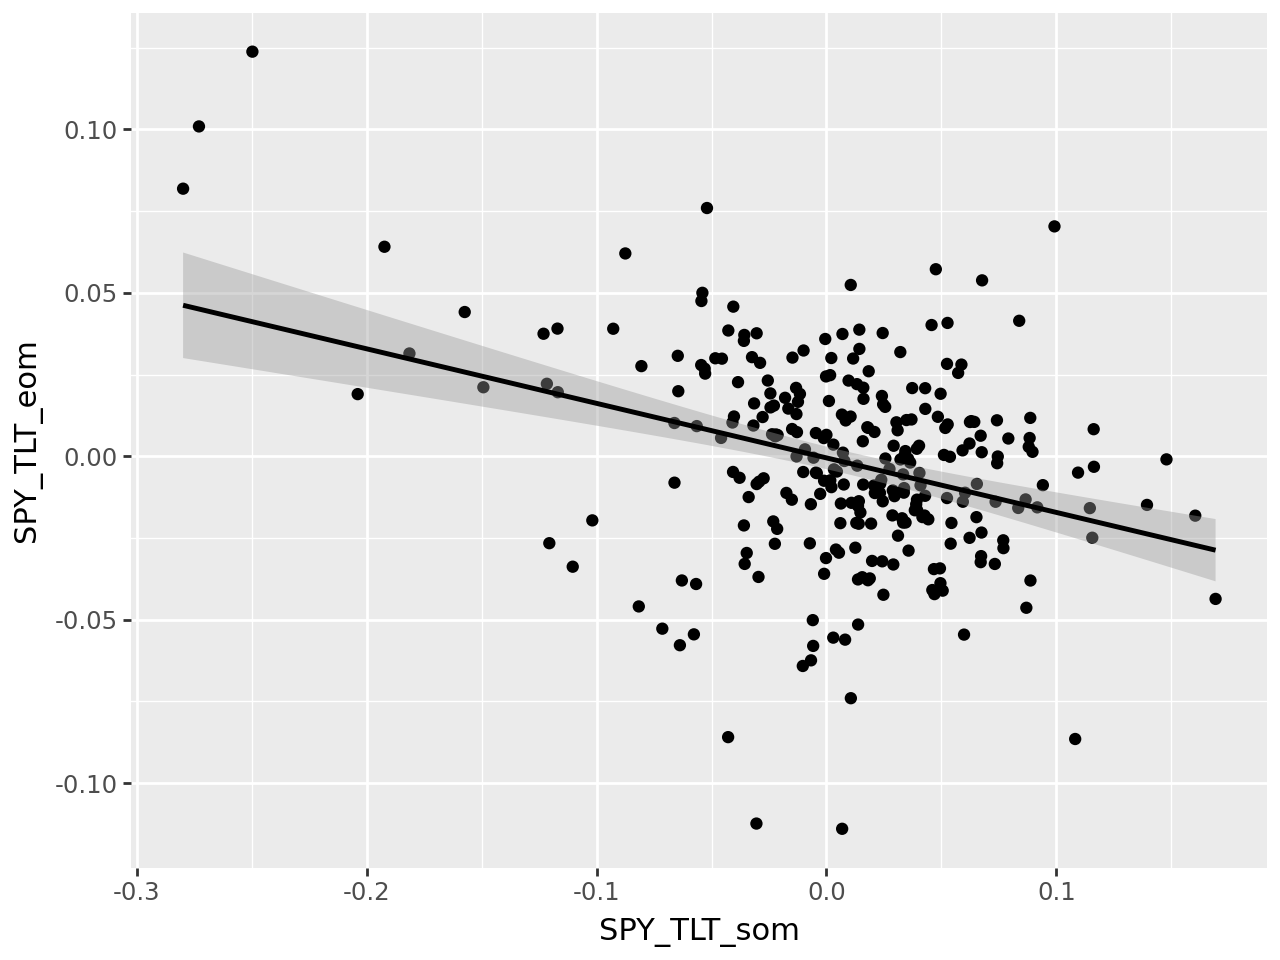

                            OLS Regression Results                            
Dep. Variable:            SPY_TLT_eom   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     35.75
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           6.89e-09
Time:                        22:36:14   Log-Likelihood:                 591.77
No. Observations:                 279   AIC:                            -1180.
Df Residuals:                     277   BIC:                            -1172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0005      0.002     -0.286      

In [274]:
# plot using plotnine
(
    return_data
    .pipe(p9.ggplot)
    + p9.aes(x='SPY_TLT_som', y='SPY_TLT_eom')
    + p9.geom_point()
    + p9.geom_smooth(method="lm")
).show()                                                           # have to explicitly call show otherwise only get print statement below

mod = smf.ols('SPY_TLT_eom ~ SPY_TLT_som', return_data)
res = mod.fit()
print(res.summary())

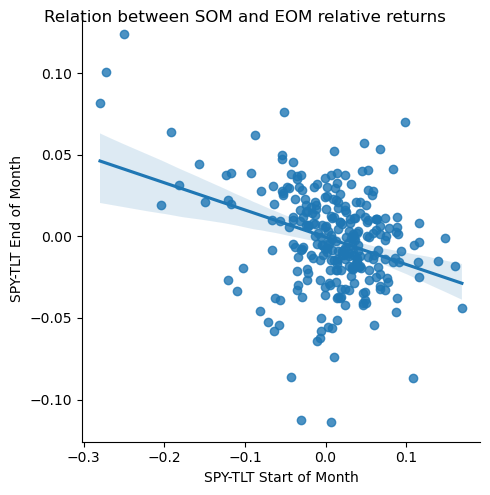

In [275]:
# plot using seaborn with customization
g = sns.lmplot(x='SPY_TLT_som', y='SPY_TLT_eom', data=return_data)
g.set_axis_labels('SPY-TLT Start of Month', 'SPY-TLT End of Month')
g.fig.suptitle('Relation between SOM and EOM relative returns')
plt.show()

## Relationship between EOM and Next SOM

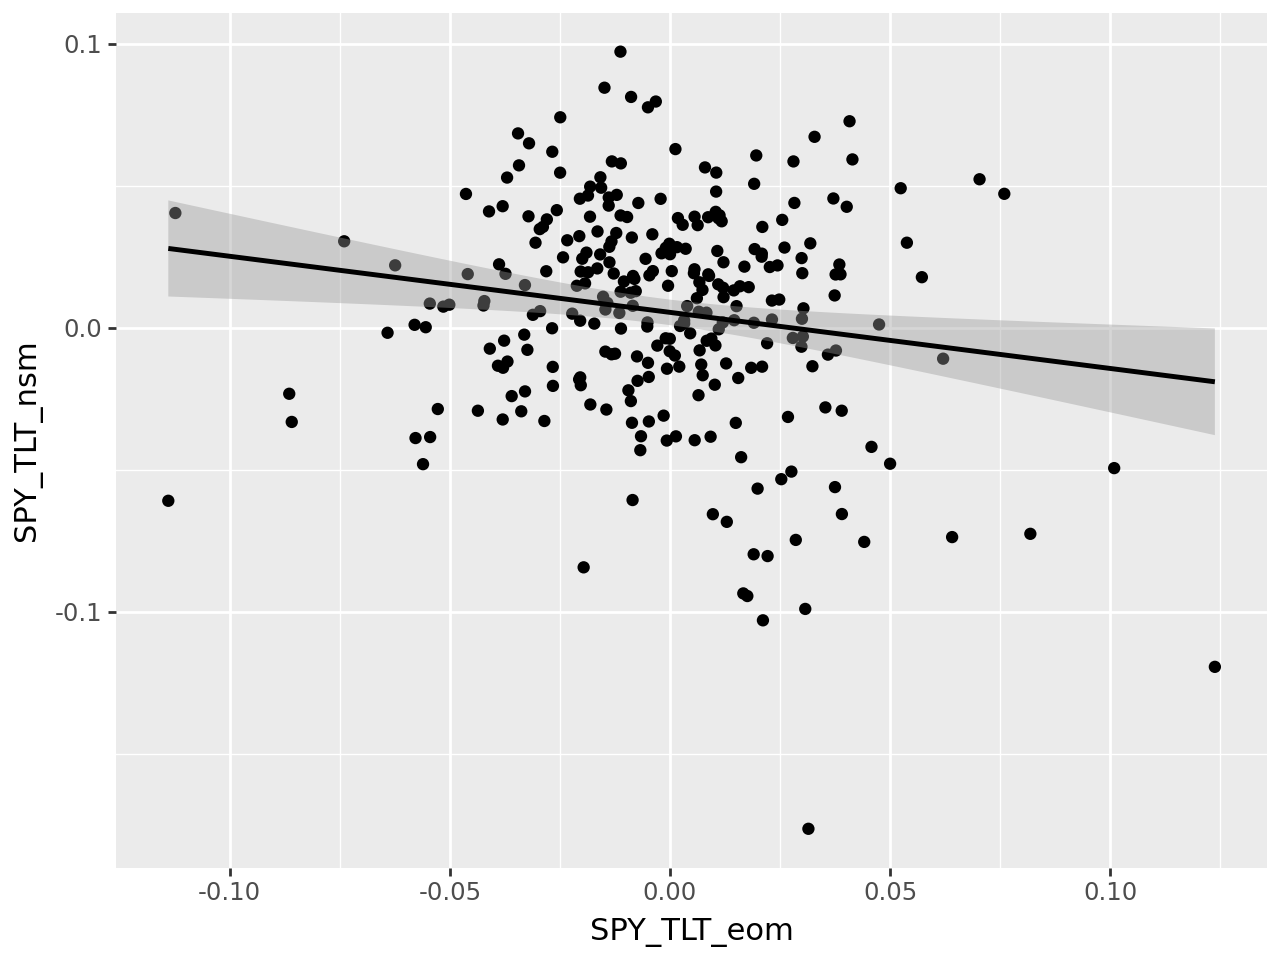

                            OLS Regression Results                            
Dep. Variable:            SPY_TLT_nsm   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     7.152
Date:                Wed, 29 Oct 2025   Prob (F-statistic):            0.00793
Time:                        22:36:14   Log-Likelihood:                 517.14
No. Observations:                 279   AIC:                            -1030.
Df Residuals:                     277   BIC:                            -1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0054      0.002      2.379      

In [276]:
# plot using pilotnine
(
    return_data
    .pipe(p9.ggplot)
    + p9.aes(x='SPY_TLT_eom', y='SPY_TLT_nsm')
    + p9.geom_point()
    + p9.geom_smooth(method="lm")
).show()

mod = smf.ols('SPY_TLT_nsm ~ SPY_TLT_eom', return_data)
res = mod.fit()
print(res.summary())

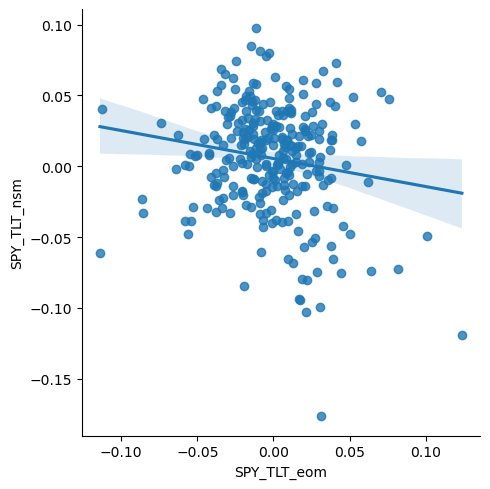

In [277]:
# plot using seaborn
sns.lmplot(x='SPY_TLT_eom', y='SPY_TLT_nsm', data=return_data)
plt.show()

## Relationship between SOM and Next SOM

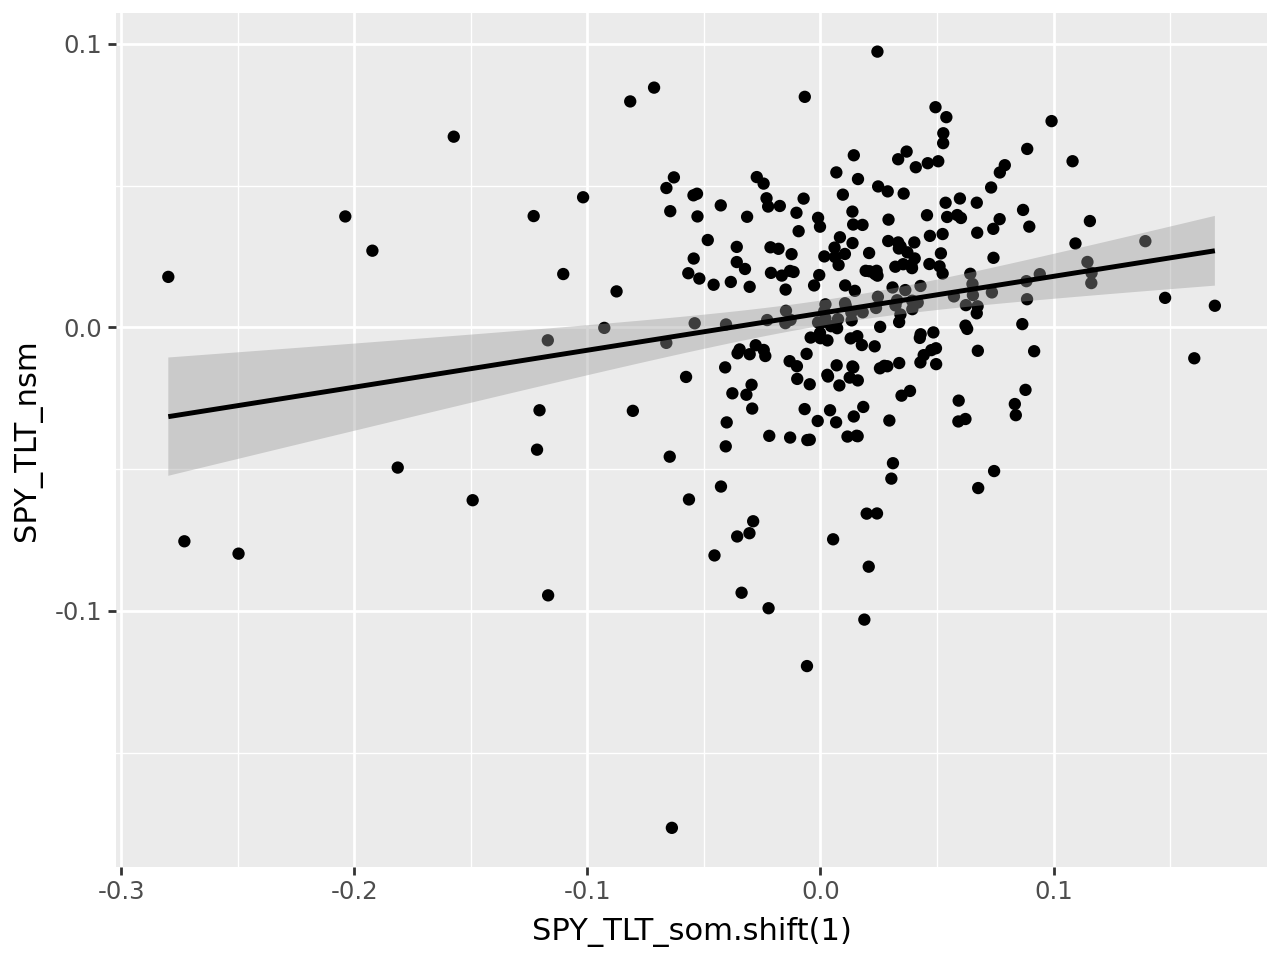

                            OLS Regression Results                            
Dep. Variable:            SPY_TLT_nsm   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     13.07
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           0.000357
Time:                        22:36:15   Log-Likelihood:                 518.66
No. Observations:                 278   AIC:                            -1033.
Df Residuals:                     276   BIC:                            -1026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0050 

In [278]:
# plot using plotnine
(
    return_data
    .pipe(p9.ggplot)
    + p9.aes(x='SPY_TLT_som.shift(1)', y='SPY_TLT_nsm')
    + p9.geom_point()
    + p9.geom_smooth(method="lm")
).show()

mod = smf.ols('SPY_TLT_nsm ~ SPY_TLT_som.shift(1)', return_data)
res = mod.fit()
print(res.summary())

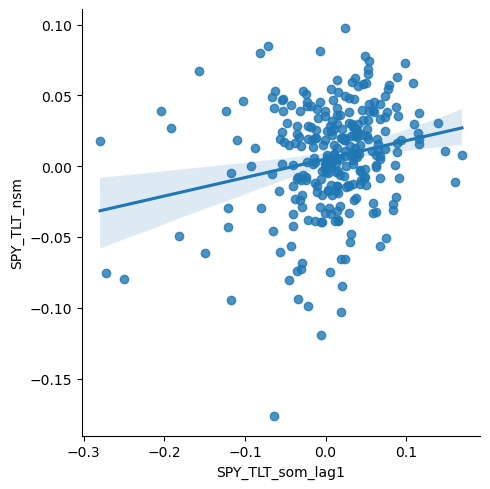

In [279]:
# Create shifted column, then plot using seaborn
return_data_shifted = return_data.assign(SPY_TLT_som_lag1=lambda x: x['SPY_TLT_som'].shift(1))

sns.lmplot(x='SPY_TLT_som_lag1', y='SPY_TLT_nsm', data=return_data_shifted)
plt.show()

In [280]:
return_data.tail(5)

,SPY_ret,SPY_ret_eom,SPY_ret_nsm,TLT_ret_eom,TLT_ret_nsm,SPY_TLT_som,SPY_TLT_eom,SPY_TLT_nsm
ym,,,,,,,,
2025-06-30,0.051386,0.029493,0.016542,0.017057,-0.007096,0.010480,0.012145,0.023078
2025-07-31,0.023032,0.005120,0.004030,0.004623,-0.021519,0.033781,0.000007,0.025907
2025-08-31,0.020520,0.014948,0.000269,0.002199,0.012484,0.006702,0.012749,-0.012571
2025-09-30,0.035620,-0.000990,0.005860,0.007554,0.040198,0.007519,-0.008637,-0.033473
2025-10-31,0.028611,0.020781,0.004413,-0.002391,0.001347,-0.025525,0.023167,0.002909


In [281]:
return_data.columns

Index(['SPY_ret', 'SPY_ret_eom', 'SPY_ret_nsm', 'TLT_ret_eom', 'TLT_ret_nsm',
       'SPY_TLT_som', 'SPY_TLT_eom', 'SPY_TLT_nsm'],
      dtype='object')

In [282]:
# keep only relevant columns: SPY_TLT_som	SPY_TLT_eom	SPY_TLT_nsm
return_data_original = return_data[["SPY_TLT_som", "SPY_TLT_eom", "SPY_TLT_nsm"]]
return_data_original.tail(5)

,SPY_TLT_som,SPY_TLT_eom,SPY_TLT_nsm
ym,,,
2025-06-30,0.010480,0.012145,0.023078
2025-07-31,0.033781,0.000007,0.025907
2025-08-31,0.006702,0.012749,-0.012571
2025-09-30,0.007519,-0.008637,-0.033473
2025-10-31,-0.025525,0.023167,0.002909


In [283]:
pl_data = (
    return_data
    .assign(
        flag=lambda x: np.select([x['SPY_TLT_som'] < 0], [1], -1),
        SPY_TLT_eom_pl=lambda x: x['flag'] * x['SPY_TLT_eom'],
        SPY_TLT_nsm_pl=lambda x: (-x['flag'].shift(1) * x['SPY_TLT_nsm']).fillna(0.0),
        pl=lambda x: x['SPY_TLT_eom_pl'] + x['SPY_TLT_nsm_pl'],
        cpl_nsm=lambda x: (1 + x['SPY_TLT_nsm_pl']).cumprod(),
        cpl_full=lambda x: (1 + x['pl']).cumprod(),
        SPY=lambda x: (1 + x['SPY_ret']).cumprod()
    )
    .reset_index()
)    

This code implements a **rebalancing strategy backtest** that trades on the relative performance between SPY (stocks) and TLT (bonds) across different periods within each month. The strategy is based on the premise that institutional rebalancing creates predictable price movements.

## Signal Generation and Position Logic

The **flag generation** uses `np.select([x['SPY_TLT_som'] < 0], [1], -1)` to create trading signals based on the start-of-month (SOM) relative performance between SPY and TLT. When bonds outperform stocks in the first 15 days (`SPY_TLT_som < 0`), the flag is set to 1, indicating that rebalancing flows will likely favor stocks. When stocks outperform bonds, the flag is -1, anticipating rebalancing flows toward bonds.

The **end-of-month P&L** calculation (`SPY_TLT_eom_pl`) multiplies the flag by the relative performance in the last days of the month (`SPY_TLT_eom`). This captures the strategy's performance during the period when monthly rebalancing typically occurs, as institutional investors adjust their portfolios before month-end.

## Cross-Month Strategy Implementation

The **next start-of-month P&L** (`SPY_TLT_nsm_pl`) implements a more complex logic using `(-x['flag'].shift(1) * x['SPY_TLT_nsm']).fillna(0.0)`. The `shift(1)` operation uses the **previous month's signal** to trade the current month's first 5 days, reflecting the hypothesis that rebalancing effects persist into the following month. The negative sign inverts the signal, suggesting a **mean reversion effect** where the previous month's outperforming asset tends to underperform in the early days of the next month.

## Portfolio Construction and Performance Tracking

The **combined P&L** (`pl`) adds both the end-of-month and next start-of-month returns, creating a comprehensive strategy that captures both intra-month and cross-month rebalancing effects. The code then calculates **cumulative performance** using `(1 + returns).cumprod()` for both the partial strategy (`cpl_nsm`) and the full strategy (`cpl_full`), along with a SPY benchmark for comparison.

## Key Strategic Insights

This implementation reflects sophisticated understanding of **institutional trading patterns**, where large portfolio managers must rebalance at month-end to meet benchmark requirements. The strategy attempts to profit from these predictable flows by positioning ahead of expected price movements and capturing both the immediate rebalancing impact and the subsequent mean reversion effects in the following month.

In [284]:
"""
cpl_full, green, combined P&L from month end and next start of month
cpl_nsm, blue, combined P&L from next start of month only

""";

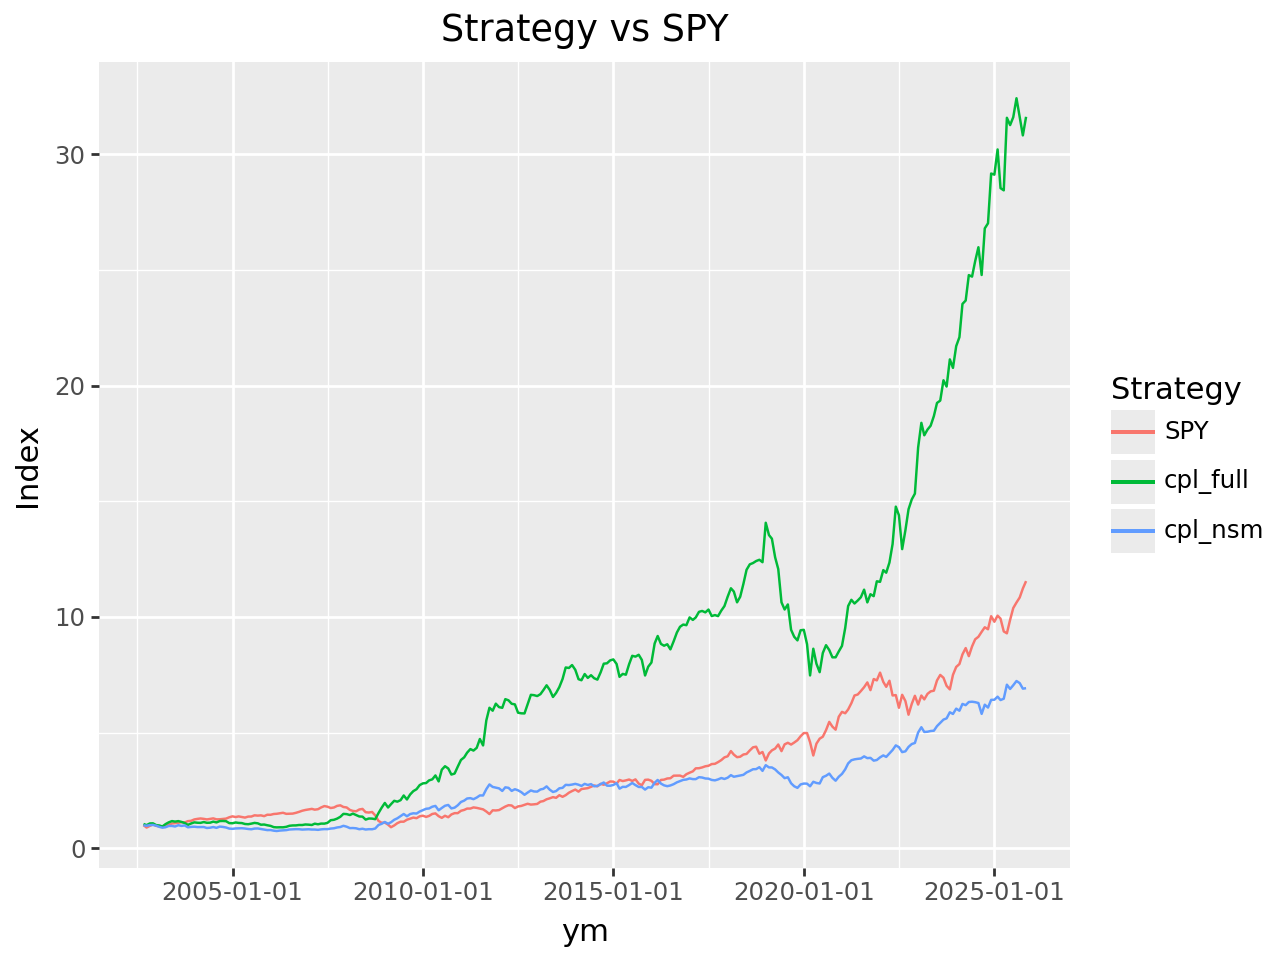

In [285]:
(
    pl_data
    [['ym', 'cpl_nsm', 'cpl_full', 'SPY']]
    .melt(id_vars='ym', var_name='Strategy', value_name='Index')
    .pipe(p9.ggplot)
    + p9.aes(x='ym', y='Index', color='Strategy')
    + p9.geom_line()
    + p9.ggtitle('Strategy vs SPY')
)

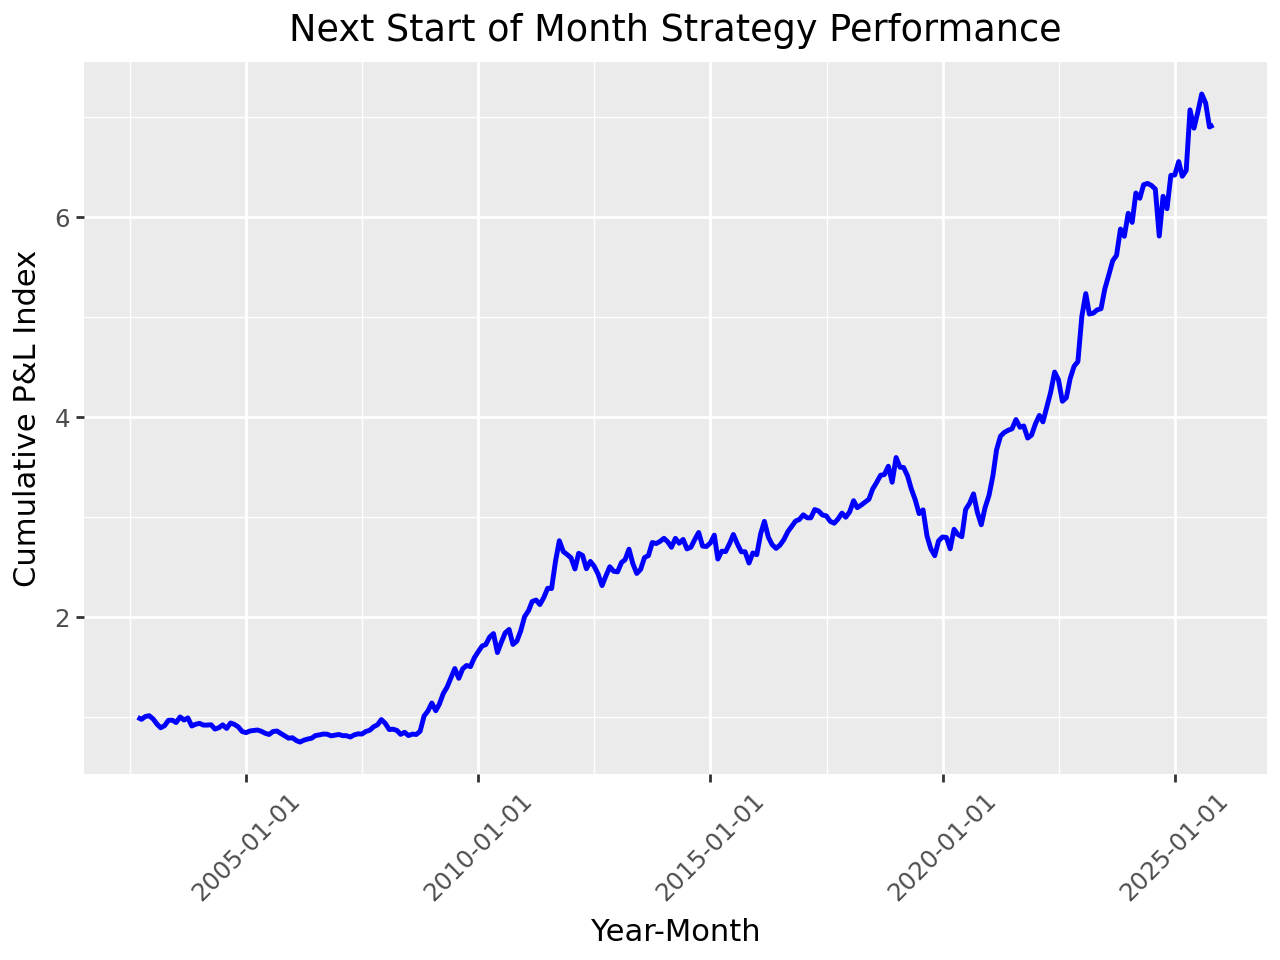

In [286]:
# Plot Next Start of Month Strategy only
(
    pl_data
    [['ym', 'cpl_nsm']]
    .pipe(p9.ggplot)
    + p9.aes(x='ym', y='cpl_nsm')
    + p9.geom_line(color='blue', size=1)
    + p9.ggtitle('Next Start of Month Strategy Performance')
    + p9.xlab('Year-Month')
    + p9.ylab('Cumulative P&L Index')
    + p9.theme(axis_text_x=p9.element_text(rotation=45))
)

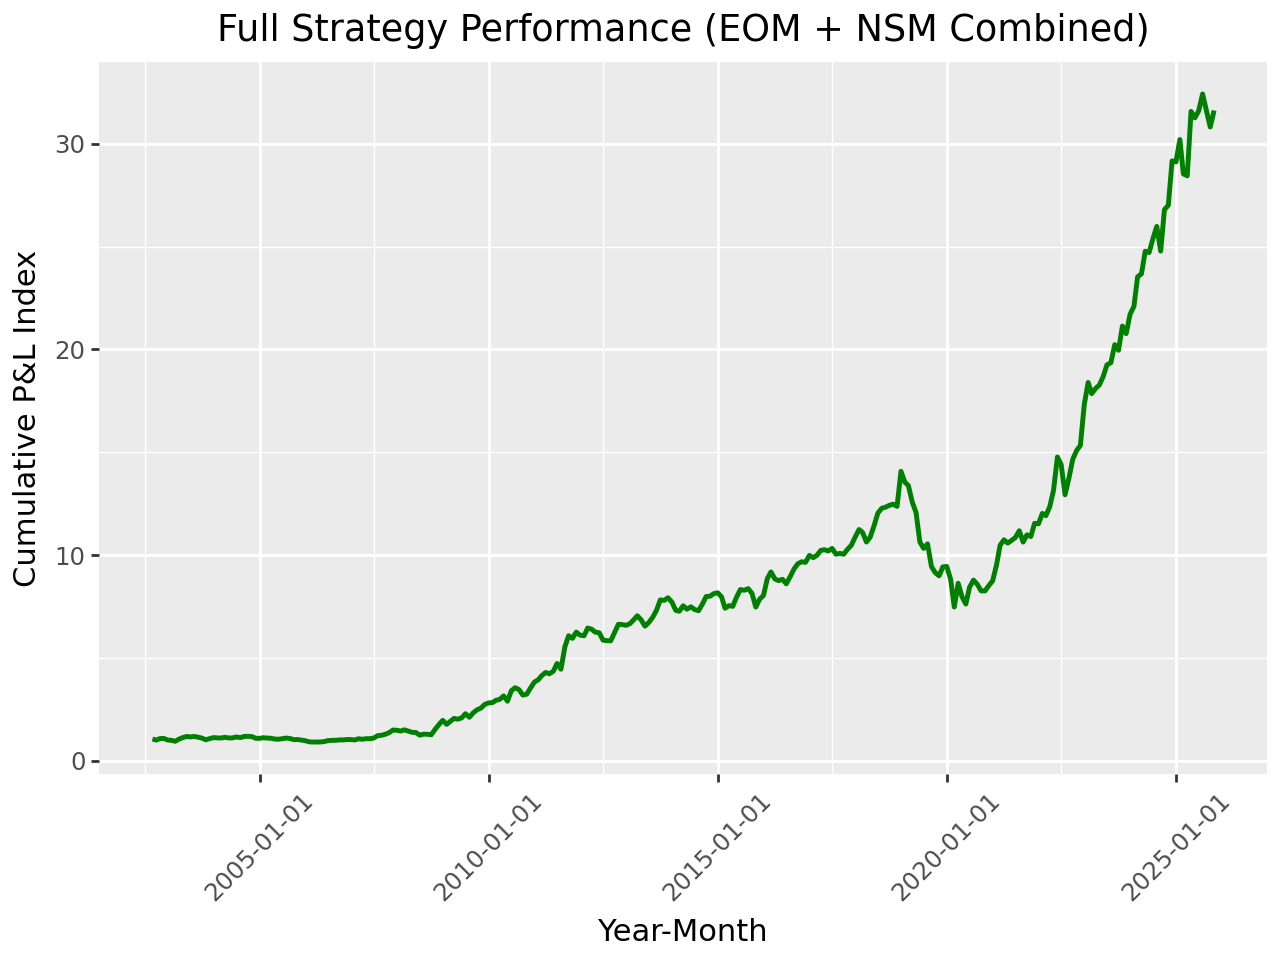

In [287]:
# Plot Full Strategy only
(
    pl_data
    [['ym', 'cpl_full']]
    .pipe(p9.ggplot)
    + p9.aes(x='ym', y='cpl_full')
    + p9.geom_line(color='green', size=1)
    + p9.ggtitle('Full Strategy Performance (EOM + NSM Combined)')
    + p9.xlab('Year-Month')
    + p9.ylab('Cumulative P&L Index')
    + p9.theme(axis_text_x=p9.element_text(rotation=45))
)

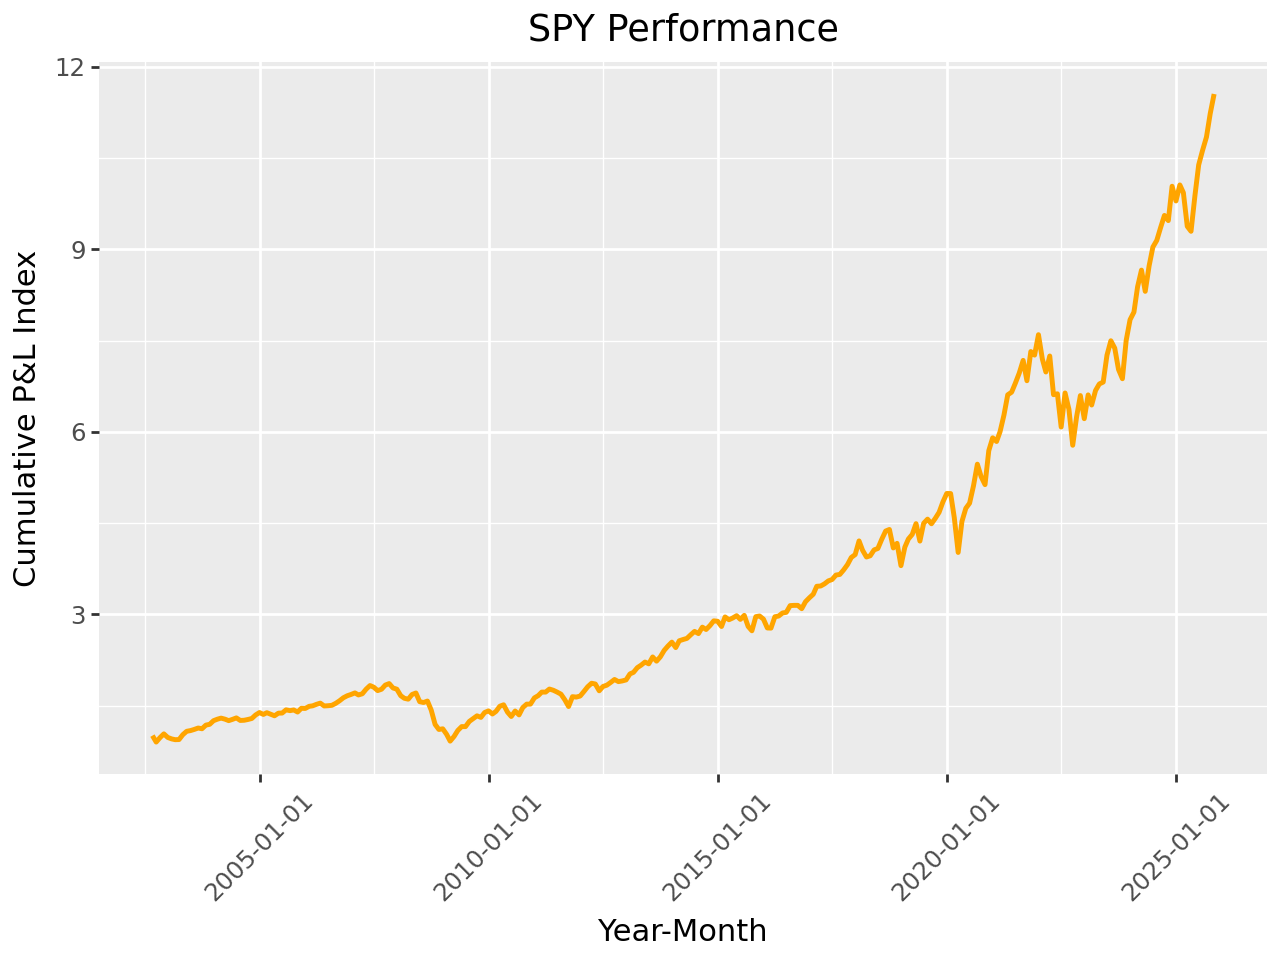

In [288]:
# Plot SPY only
(
    pl_data
    [['ym', 'SPY']]
    .pipe(p9.ggplot)
    + p9.aes(x='ym', y='SPY')
    + p9.geom_line(color='orange', size=1)
    + p9.ggtitle('SPY Performance')
    + p9.xlab('Year-Month')
    + p9.ylab('Cumulative P&L Index')
    + p9.theme(axis_text_x=p9.element_text(rotation=45))
)

In [289]:
ret_strategy = pl_data['pl'].mean() * 12
vol_strategy = pl_data['pl'].std() * np.sqrt(12)
sr_strategy = ret_strategy / vol_strategy
mdd_strategy = (pl_data['cpl_full']/pl_data['cpl_full'].expanding().max() - 1.0).min()

ret_nsm = pl_data['SPY_TLT_nsm_pl'].mean() * 12
vol_nsm = pl_data['SPY_TLT_nsm_pl'].std() * np.sqrt(12)
sr_nsm = ret_strategy / vol_strategy
mdd_nsm = (pl_data['cpl_nsm']/pl_data['cpl_nsm'].expanding().max() - 1.0).min()

ret_spy = pl_data['SPY_ret'].mean() * 12
vol_spy = pl_data['SPY_ret'].std() * np.sqrt(12)
sr_spy = ret_spy / vol_spy
mdd_spy = (pl_data['SPY'] / pl_data['SPY'].expanding().max() - 1.0).min()

print(f'Next SOM Return = {ret_nsm:.2%}, Strategy Vol = {vol_nsm:.2%}, Strategy Sharpe = {sr_nsm:.2f}, Strategy Max DrawDown = {mdd_nsm:.2%}')
print(f'Strategy Return = {ret_strategy:.2%}, Strategy Vol = {vol_strategy:.2%}, Strategy Sharpe = {sr_strategy:.2f}, Strategy Max DrawDown = {mdd_strategy:.2%}')
print(f'SPY Return      = {ret_spy:.2%}, SPY Vol      = {vol_spy:.2%}, SPY Sharpe      = {sr_spy:.2f}, SPY Max DrawDown      = {mdd_spy:.2%}')

Next SOM Return = 9.21%, Strategy Vol = 13.17%, Strategy Sharpe = 0.92, Strategy Max DrawDown = -27.28%
Strategy Return = 16.50%, Strategy Vol = 17.91%, Strategy Sharpe = 0.92, Strategy Max DrawDown = -46.88%
SPY Return      = 11.66%, SPY Vol      = 14.73%, SPY Sharpe      = 0.79, SPY Max DrawDown      = -50.78%
